Found 1913 images belonging to 5 classes.
Found 480 images belonging to 5 classes.
{'Dolphin': 0, 'Eel': 1, 'Penguin': 2, 'Seal': 3, 'Sharks': 4}
['Dolphin', 'Eel', 'Penguin', 'Seal', 'Sharks']
Number of images in each training class:
Dolphin : 400
Eel     : 397
Penguin : 385
Seal    : 331
Sharks  : 400


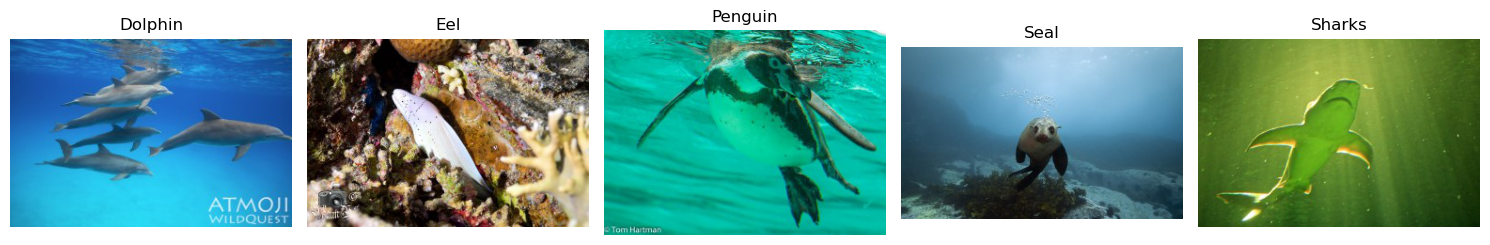

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 298, 298, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 298, 298, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 149, 149, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 128)     7

2023-12-15 21:31:24.485858: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


59/59 [==============================] - 178s 3s/step - loss: 1.7709 - accuracy: 0.3913 - val_loss: 1.7346 - val_accuracy: 0.2229 - lr: 0.0010
Epoch 2/50
59/59 [==============================] - 232s 4s/step - loss: 1.3668 - accuracy: 0.4790 - val_loss: 1.9461 - val_accuracy: 0.2208 - lr: 0.0010
Epoch 3/50
59/59 [==============================] - 181s 3s/step - loss: 1.2575 - accuracy: 0.5072 - val_loss: 2.1136 - val_accuracy: 0.2188 - lr: 0.0010
Epoch 4/50
59/59 [==============================] - 197s 3s/step - loss: 1.2650 - accuracy: 0.5152 - val_loss: 2.0538 - val_accuracy: 0.2750 - lr: 0.0010
Epoch 5/50
59/59 [==============================] - 207s 3s/step - loss: 1.2399 - accuracy: 0.5162 - val_loss: 2.0338 - val_accuracy: 0.2875 - lr: 0.0010
Epoch 6/50
59/59 [==============================] - 193s 3s/step - loss: 1.2015 - accuracy: 0.5380 - val_loss: 2.0231 - val_accuracy: 0.2979 - lr: 0.0010
Epoch 7/50
59/59 [==============================] - 242s 4s/step - loss: 1.1855 - accur

In [1]:
# Standard Library Imports
import os

# Scientific and Data Processing Libraries
import numpy as np
from sklearn.metrics import classification_report

# Machine Learning and Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Visualization Libraries
import matplotlib.pyplot as pyplot
import matplotlib.image as mpimg
import seaborn as sns
    
train_dir = 'images/train'
test_dir = 'images/test'

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(300, 300), batch_size=32, class_mode='sparse'
)  # expect integer labels

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(300, 300), batch_size=32, class_mode='sparse'
)

class_indices = train_generator.class_indices
print(class_indices)


# Create a list of class labels sorted by their index
class_labels = [label for label, index in sorted(class_indices.items(), key=lambda item: item[1])]
print(class_labels)


# Count and print the number of images in each training class
image_counts = {}
for cls in class_labels:
    cls_dir = os.path.join(train_dir, cls)
    image_counts[cls] = len(os.listdir(cls_dir))
    
# Find the maximum length of class name for alignment
max_class_name_length = max(len(class_name) for class_name in class_labels)

print("Number of images in each training class:")
for cls, count in image_counts.items():
    print(f"{cls:<{max_class_name_length}} : {count}")
    

# Set up the plot
fig = pyplot.figure(figsize=(15, 15))  # Set the size of the figure
k = 0  # Counter for subplot indexing

# Loop through each fruit class and display an image
for fruit in class_labels:
    for file in os.listdir(os.path.join(train_dir, fruit))[0:1]:  # Select the first image from each class
        img = mpimg.imread(os.path.join(train_dir, fruit, file))
        k += 1  # Increment counter
        pyplot.subplot(5, 5, k)  # Create a subplot for each image
        pyplot.title(fruit)  # Set the title of the subplot as the fruit name
        pyplot.imshow(img)  # Display the image
        pyplot.axis('off')  # Turn off axis

pyplot.tight_layout()  # Adjust the spacing between images
pyplot.show()  # Display the plot

# Define a modified CNN model
model = Sequential([
    Conv2D(64, (3, 3), padding='valid', input_shape=(300, 300, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(5, activation='softmax'),
])

# Sparse Categorical Crossentropy as the loss function
# ^ Sparse: Labels are integers (not one-hot vectors).
# ^ from_logits=False: Model outputs probabilities (has softmax layer).
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model.summary()

# Apply learning rate reduction on plateau and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with adjusted parameters [reduce_lr, early_stop]
epochs = 50  # Adjust the number of epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=test_generator,
    validation_steps=test_generator.samples // 32,
    epochs=epochs,
    callbacks=[reduce_lr, early_stop]
)


# Save the model
model.save('sea_animal_classification_model.h5')

# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))
print('> Accuracy on test data: %.2f' % (accuracy * 100.0))
print('> Loss on test data: %.2f' % loss)


# Plot training curves
pyplot.figure(figsize=(5, 4), dpi=200)
sns.set_style('darkgrid')

# Plot for loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
pyplot.legend()

# Adjust the space between plots
pyplot.subplots_adjust(hspace=0.5)

# Plot for accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.legend()

# Save plots to file
pyplot.savefig('sea_animal_classification_model.png')
pyplot.close()

# Predict the labels on the test set
test_generator.reset()  # Resetting the generator to ensure the order of files and predictions match
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_classes = test_generator.classes

# Generate the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)
